In [110]:
import pandas as pd
import matplotlib.pyplot as plt

The original essential genes dataset had 28166 rows but only 26791 had available sequences

In [111]:
deg_dataset = pd.read_csv("datasets/essential_genes.csv", sep=';')
print(deg_dataset.shape)

ensembl_dataset = pd.read_csv("datasets/ensembl.csv", sep=',')
print(ensembl_dataset.shape)

(26791, 15)
(22824, 2)


Calculating length of each sequence and cleaning up the data

In [112]:
# calculate length of each gene (last row)
deg_dataset["length"] = deg_dataset["sequence"].str.len()
ensembl_dataset["length"] = ensembl_dataset["sequence"].str.len()

In [113]:
deg_dataset = deg_dataset[deg_dataset["length"] <= 27000]
print(deg_dataset.shape)

ensembl_dataset = ensembl_dataset[ensembl_dataset["length"] <= 100000]
print(ensembl_dataset.shape)

(26790, 16)
(19046, 3)


Statistics about the data, including:
* Total sequences
* Top 5 longest sequences
* Top 5 shortest sequences
* Average length of sequences
* Most common sequence length

In [114]:
def stats(dataset):
    dataset["length"].hist(bins=100)
    plt.show()

    print("------------------------------------")

    print("Total sequences:", dataset.shape[0])

    print("------------------------------------")

    print("Top 5 longest sequences:")
    print("id       length")
    print(dataset["length"].nlargest(5).to_string())

    print("------------------------------------")

    print("Top 5 shortest sequences:")
    print("id       length")
    print(dataset["length"].nsmallest(5).to_string())

    print("------------------------------------")

    average_length = dataset["length"].mean()
    print("Average length:", average_length)

    print("------------------------------------")

    print("Most common lengths:")
    print("length   count")
    print(dataset["length"].value_counts().to_string())

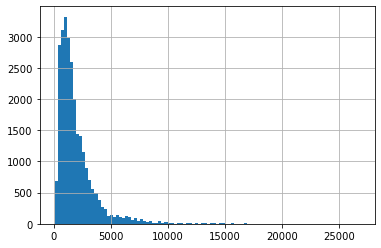

------------------------------------
Total sequences: 26790
------------------------------------
Top 5 longest sequences:
id       length
19660    26778
1223     26394
2298     25578
1661     23253
3222     23253
------------------------------------
Top 5 shortest sequences:
id       length
5943      78
8094      78
25617    135
4647     144
6718     144
------------------------------------
Average length: 1951.3291899962674
------------------------------------
Most common lengths:
length   count
1041     87
1083     87
1314     85
555      80
1005     79
1371     79
585      77
1221     77
1131     77
1428     76
1395     75
1143     74
786      71
1191     70
606      68
1515     68
996      67
882      67
597      66
684      66
642      63
972      63
1530     62
984      62
816      62
1452     61
618      61
1188     61
1359     61
1212     60
1020     60
1443     60
1299     60
537      60
477      60
774      60
429      59
615      58
627      58
795      58
1320     58
1647  

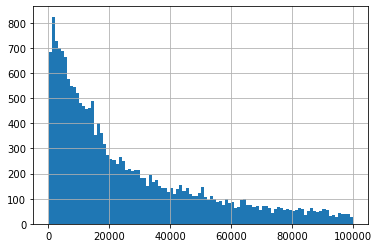

------------------------------------
Total sequences: 19046
------------------------------------
Top 5 longest sequences:
id       length
20208    99989
450      99960
12089    99954
14019    99917
15700    99892
------------------------------------
Top 5 shortest sequences:
id       length
21861    39
22277    51
22035    54
22603    57
22653    63
------------------------------------
Average length: 25772.153575553923
------------------------------------
Most common lengths:
length   count
1272     31
939      26
1593     24
930      21
936      16
945      15
942      14
966      11
957      11
8060     10
24560    10
3323     10
597      10
2483      9
16361     9
4121      9
11434     9
8736      9
933       9
16795     9
1968      9
18894     8
3625      8
3011      8
3995      8
23121     8
1028      8
1672      8
3916      8
1516      8
4758      8
1069      8
11507     8
4276      7
3198      7
35857     7
972       7
6838      7
10917     7
23997     7
2475      7
9491      7

In [115]:
stats(deg_dataset)
print("*" * 100)
stats(ensembl_dataset)

Creating positive essential genes dataset. Each sequence needs to be in at least 5 datasets.

In [116]:
# for each sequence, get all the datasets that contain it
d = {}
for _, row in deg_dataset.iterrows():
    if(row["sequence"] in d):
        d[row["sequence"]].append(row["id1"])
    else:
        d[row["sequence"]] = [row["id1"]]


# get a list of sequences that are in more than 5 datasets
essential_sequences = []
for key, val in d.items():
    if(len(val) >= 5):
        essential_sequences.append(key)
        
# create dataframe with essential sequences
essential_dataset = pd.DataFrame(essential_sequences, columns=["sequence"])
print(essential_dataset.head())
print(essential_dataset.shape)

                                            sequence
0  ATGGTGCTGTCCCAGAGACAACGAGATGAACTAAATCGAGCTATAG...
1  ATGGCTGCAGCTTCATATGATCAGTTGTTAAAGCAAGTTGAGGCAC...
2  ATGAGCCGCCTGCTCTGGAGGAAGGTGGCCGGCGCCACCGTCGGGC...
3  ATGCAGAGCTGGAGTCGTGTGTACTGCTCCTTGGCCAAGAGAGGCC...
4  ATGGTTGGCTATGACCCCAAACCAGATGGCAGGAATAACACCAAGT...
(2010, 1)


Creating dataset with all DEG sequences. Later, sequences that are in this dataset will be removed from the Ensembl dataset and form the negative dataset.

In [117]:
seqs_dataset = deg_dataset.iloc[:, deg_dataset.shape[1] - 2]
print(seqs_dataset.head())
print(seqs_dataset.shape)

0    ATGGAGTTTTCAAGTCCTTCCAGAGAGGAATGTCCCAAGCCTTCGG...
1    ATGGACCATCGAAAAGCCAGGGTCCTCCCAGCTGGGCACTACTGCC...
2    ATGCGGGGCGTGTGGCCGCCCCCGGTGTCCGCCCTGCTGTCGGCGC...
3    ATGGGGTGGCGGGCGGCGGGCGCGCTGCTGCTGGCGCTGCTGCTGC...
4    ATGGTTCTAGCGCAGAGCCGGGTGTCTGCCGGGGTGGGCTCCCCGC...
Name: sequence, dtype: object
(26790,)


In [118]:
with open('datasets/essential_genes_clean_total.csv', 'w') as file:
    file.write('id,sequence\n')
    seqs_dataset.to_csv(file, sep=',', header=False)
    
with open('datasets/essential_genes_clean.csv', 'w') as file:
    file.write('id,sequence\n')
    essential_dataset.to_csv(file, sep=',', header=False)

In [119]:
# average_length = int(average_length)

# cut sequences to the average length
# seqs_dataset = seqs_dataset.str.slice(0, average_length)

# fill with "N" the sequences that are shorter than average length
# seqs_dataset = seqs_dataset.str.pad(average_length, side='right', fillchar='N')